<a href="https://colab.research.google.com/github/KiyongAhn/rep01/blob/master/24_My_First_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Convolutional Neural Network

## MNIST & CIFAR-10

### Your name :

#### 실습목표<br>
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

--------------------------
Rayleigh Kim @ D:plus

## My First CNN on MNIST

## 일단 Quick 하게!!

코드는 정말 수루룩 끝난다!

그래서 다시 한 번! 다음 그림을 보고 구조를 확실히 추적할 수 있어야 한다.

* [Ex1](https://cdn-images-1.medium.com/max/1600/1*O9ulXVmjBustHGLi1zRthA.png)
* [Ex2](https://cdn-images-1.medium.com/max/1600/1*jqKHgwZ8alM3K_JRYO_l4w.png)
* [Ex3](https://s3.amazonaws.com/acadgildsite/wordpress_images/Data+Science/Implementation+Of+A+Convolutional+Neural+Network/0.png)



### 라이브러리 로딩

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from keras import layers, models
from keras import backend

import random as rd

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 8621
다음 그림은 숫자 0 입니다.


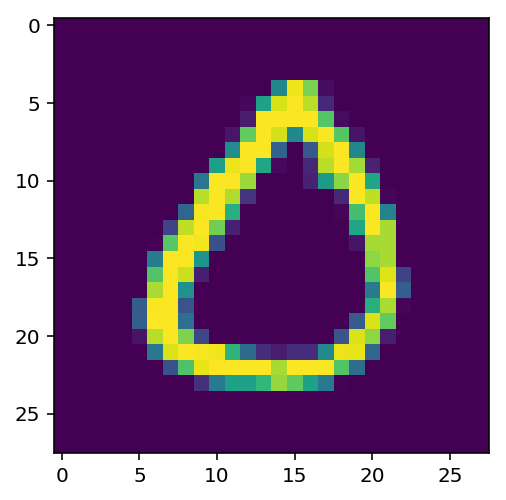

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
plt.imshow(test_x[id])
plt.show()

### Keras에서 Convolutional Layer를 사용하기 위한 reshape!

In [0]:
# One Hot Encoding
train_y = keras.utils.to_categorical(train_y)
test_y = keras.utils.to_categorical(test_y)

In [0]:
# 마지막은 RGB 규격. 1이면 흑백으로 하겠다
train_x = train_x.reshape(train_x.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


이미지 값을 0 ~ 1 사이 값을 갖도록 스케일 조정!

In [0]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


In [0]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


## Sequential 을 이용하여 모델링 하자!

CNN에 관한 것만 추가가 된다.
[여기](https://keras.io/layers/convolutional/)를 적극적으로 참고하자

In [0]:
backend.image_data_format()

'channels_last'

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = keras.models.Sequential()

# Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

model.add( layers.Conv2D(filters = 8,            # filter의 개수
                         kernel_size = (3, 3),   # Filter Size. 기본적으로 홀수 단위
                         activation='relu',      
                        input_shape = (28, 28,1))  ) # stride 

model.add( layers.Conv2D(filters = 16,
                         kernel_size = (3, 3),
                         activation='relu')  )

model.add( layers.Flatten() )

model.add( layers.Dense(64, activation = 'relu') )

model.add( layers.Dense(10, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics=['accuracy'])

W0711 07:43:55.992970 140464580818816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0711 07:43:55.995131 140464580818816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0711 07:43:56.021868 140464580818816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 07:43:56.026608 140464580818816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W071

In [0]:
# ###########################################
# ## 이 코드를 수정하여, 성능을 높여 보자! ##
# ###########################################

# '''
# 1. filter의 사이즈를 바꾸어 보아도 좋다.
# 2. filter의 숫자를 바꾸어 보아도 좋다.
# 3. Conv2D를 추가해도 좋다!
# 4. Fully Connected Layer (Dense) 의 노드 숫자를 바꾸어보아도 좋다.
# 5. model.fit 부분의 batch_size를 바꾸어 봐도 좋다.

# '''

# # 혹시 이미 그려둔 그래프가 있다면 날려줘!
# keras.backend.clear_session()

# # model에 순차적으로 레이어를 쌓아가겠다는 의도!
# model = keras.models.Sequential()

# # Sequential()을 사용하면, Input Layer는 자동으로 설계한다고 생각하면 됨!

# model.add( layers.Conv2D(filters = 8,
#                          kernel_size = (3, 3),
#                          activation='relu',
#                         input_shape = (28, 28,1))  )

# model.add( layers.Conv2D(filters = 16,
#                          kernel_size = (3, 3),
#                          activation='relu')  )

# model.add( layers.Flatten() )

# model.add( layers.Dense(64, activation = 'relu') )

# model.add( layers.Dense(10, activation = 'softmax'))

# model.compile(loss = keras.losses.categorical_crossentropy,
#               optimizer = 'adam',
#               metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                589888    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=15, batch_size = 2000,
                    validation_split = 0.2, verbose=1)


W0711 07:44:41.806987 140464580818816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 5s 105us/step - loss: 1.0101 - acc: 0.7609 - val_loss: 0.3611 - val_acc: 0.8941
Epoch 2/15
48000/48000 [==============================] - 1s 31us/step - loss: 0.3162 - acc: 0.9075 - val_loss: 0.2492 - val_acc: 0.9300
Epoch 3/15
48000/48000 [==============================] - 1s 31us/step - loss: 0.2266 - acc: 0.9347 - val_loss: 0.1876 - val_acc: 0.9478
Epoch 4/15
48000/48000 [==============================] - 1s 31us/step - loss: 0.1726 - acc: 0.9509 - val_loss: 0.1527 - val_acc: 0.9568
Epoch 5/15
48000/48000 [==============================] - 1s 31us/step - loss: 0.1355 - acc: 0.9607 - val_loss: 0.1221 - val_acc: 0.9673
Epoch 6/15
48000/48000 [==============================] - 1s 31us/step - loss: 0.1060 - acc: 0.9702 - val_loss: 0.1065 - val_acc: 0.9694
Epoch 7/15
48000/48000 [==============================] - 1s 31us/step - loss: 0.0875 - acc: 0.9755 - val_loss: 0.0913 - val_ac

In [0]:
performance_test = model.evaluate(test_x, test_y, batch_size = 100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

10000/10000 [==============================] - 0s 36us/step
Test Loss : 0.054680,  Test Accuracy : 98.260%


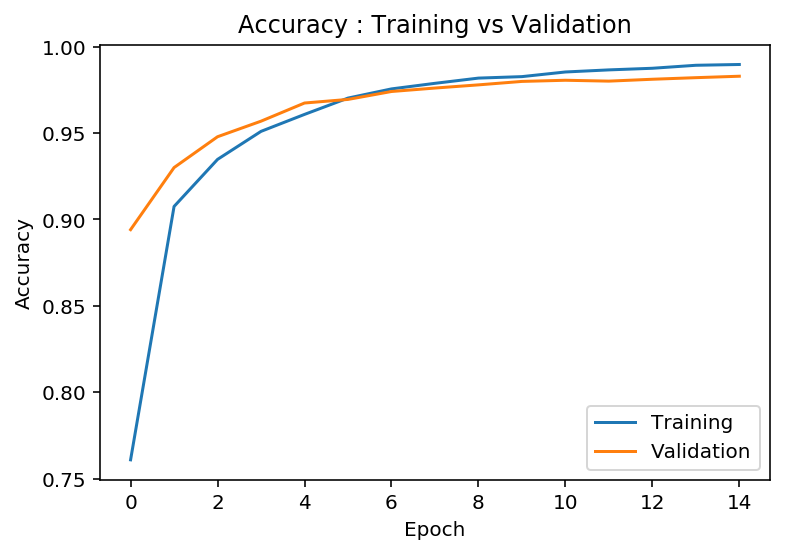

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

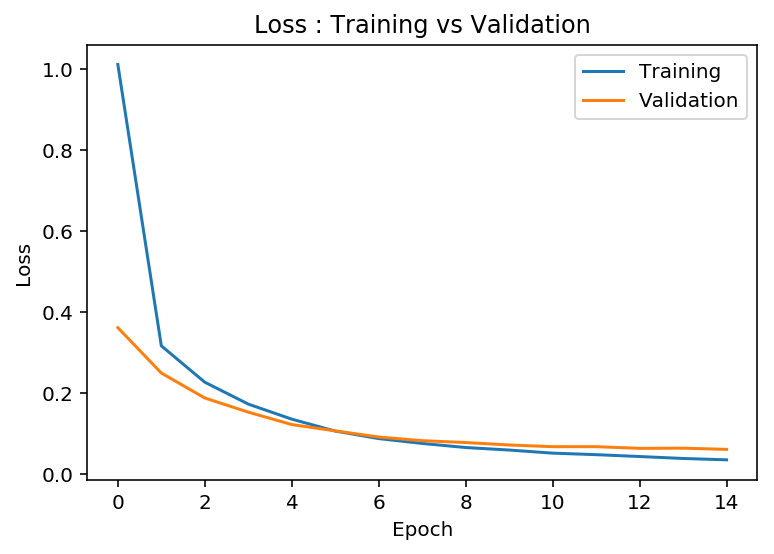

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [0]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)


logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('CNN')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

CNN
트레이닝 정확도 : 98.94%
테스트 정확도 : 98.26%


id = 9330
다음 그림은 숫자 8 입니다.
모델의 예측 : 8
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0.  0.  0. 99.  0.]
정답입니다


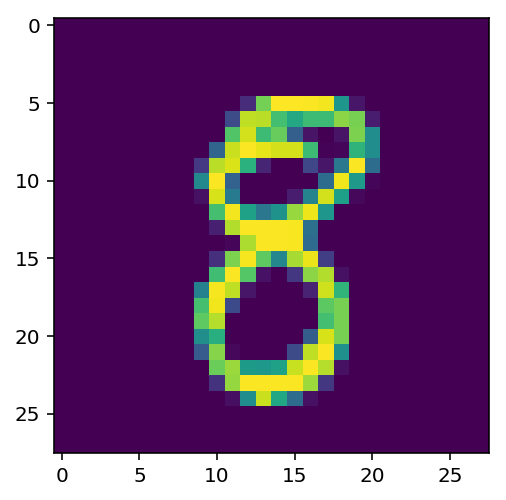

In [0]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y.argmax(axis=1)[id]))
print('모델의 예측 : {}'.format(single_pred_test[id]))
print('모델의 카테고리별 확률 : {}'.format(np.floor(pred_test[id]*100)))
if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 6572
다음 그림은 숫자 1 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [ 0. 14.  6. 41.  0. 27.  0.  6.  2.  1.]
틀렸어요


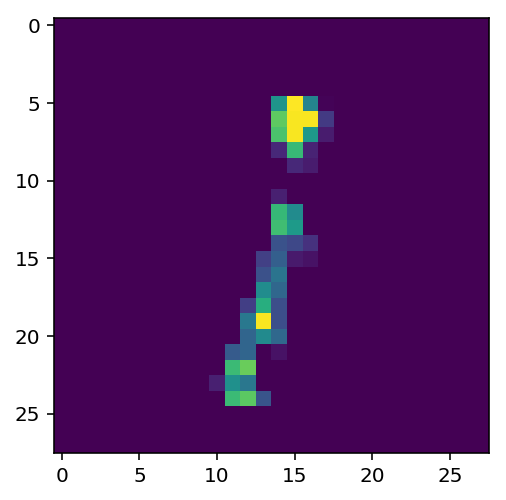

In [0]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y.argmax(axis=1)[id]))
print('모델의 예측 : {}'.format(single_pred_test[id]))
print('모델의 카테고리별 확률 : {}'.format(np.floor(pred_test[id]*100)))
if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from keras import layers, models
from keras import backend

import random as rd

from sklearn.metrics import accuracy_score

### 데이터를 불러옵시다.

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [0]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 5983
다음 그림은 Deer 입니다.


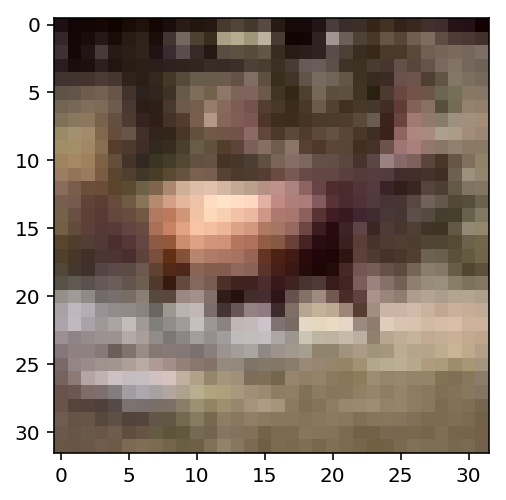

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

In [0]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


In [0]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


In [0]:
# One-hot Encoding

train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)

print(test_y[2])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


### 코드를 완성해주세요!

힌트 먼저.



반드시 사용해야 할 것!

* layers.Conv2D

```
layers.Conv2D(filters = 사용할 필터 수,
kernel_initializer = 'glorot_uniform', # 추천
bias_initializer = 'glorot_uniform', # 추천
strides = (1, 1), # 좌우로도 한 칸, 위아래도 한 칸
padding = ,# 'valid' : 없음, 'same' : same패딩
activation = None # 기본 세팅. Batch Normalization을 위하여!
use_bias = True # 기본 세팅. 왜 bias가 필요할까?
)
```
* BatchNormalization()
    * Activation 앞에 두는 것을 추천한다.
    * 하지만 모를 노릇!
    * Activation 뒤에 둘 거라면, 위 Conv2D 에서, activation = None 의 None을 다른 것으로 바꾸어주면 된다.
* Activation()
    * Conv2D나, Dense안에서 activation = 으로 해결할 것이라면 사용할 필요 없음.
    * Batch Normalization을 정석적으로 사용할 것이라면 필요함.
    * tanh, sigmoid, ReLU, eLU 정도는 알아두는 것이 좋다.
* layers.MaxPooling2D(pool_size = (2, 2))
    * activation 뒤에 풀링을 두어도 좋다.
    * AveragePooling 도 있음.
    * 그 외 다른 것을 찾아서 실험해봐도 좋다.    
* Dropout()
    * Dropout(0.2) : 방금 레이어의 노드들 중 20%는 랜덤하게 죽일거야!

* optimizers.____
    * compile 할 때, 기본 내장된 optimizer들을 조금 더 조절해가며 사용할 수 있다.
    
* EarlyStopping 의 옵션도 조절해보자.

In [0]:
#############
# Your Code #
#############

#혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = models.Sequential()

model.add( layers.Conv2D(filters=32,
                          kernel_size = (3, 3),
                        input_shape = (32, 32, 3),
                        padding = 'same'))

model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add( Dropout(0.2) )


model.add( layers.Conv2D(filters=64,
                          kernel_size = (3, 3),
                        padding = 'same'))

model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add( Dropout(0.2) )
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add( layers.Conv2D(filters=128,
                          kernel_size = (3, 3),
                        padding = 'same'))

model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add( Dropout(0.2) )
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add( layers.Flatten())

model.add( layers.Dense(512, activation='relu'))

model.add( layers.Dense(512, activation='relu'))

model.add( layers.Dense(512, activation='relu'))

model.add( layers.Dense(10, activation='softmax'))

#model.compile(loss = keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])















In [0]:
from keras import optimizers

adam = optimizers.Adam(lr=0.0001) # lr을 조정해보자.

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = adam,
              metrics =['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
__________

In [0]:
es = EarlyStopping(monitor = 'val_loss',
                  min_delta = 0, # 개선되고 있다고 판단하기 위한 최소 변화량
                  patience = 10, # 개선 없는 epoch 얼마나 기달려 줄거야?
                  verbose = 1
                  )


# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=20000, batch_size = 2048,
                    validation_split = 0.2, verbose=1,
                   callbacks = [es])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20000
40000/40000 [==============================] - 20s 508us/step - loss: 1.9718 - acc: 0.2863 - val_loss: 1.9197 - val_acc: 0.3050
Epoch 2/20000
40000/40000 [==============================] - 15s 370us/step - loss: 1.5930 - acc: 0.4293 - val_loss: 1.7677 - val_acc: 0.3410
Epoch 3/20000
40000/40000 [==============================] - 15s 368us/step - loss: 1.4619 - acc: 0.4753 - val_loss: 1.7499 - val_acc: 0.3557
Epoch 4/20000
40000/40000 [==============================] - 15s 370us/step - loss: 1.3665 - acc: 0.5085 - val_loss: 1.6693 - val_acc: 0.3818
Epoch 5/20000
40000/40000 [==============================] - 15s 370us/step - loss: 1.2941 - acc: 0.5358 - val_loss: 1.7124 - val_acc: 0.3588
Epoch 6/20000
40000/40000 [==============================] - 15s 369us/step - loss: 1.2306 - acc: 0.5605 - val_loss: 1.8175 - val_acc: 0.3118
Epoch 7/20000
40000/40000 [==============================] - 15s 370us/step - loss: 1.1916 - acc: 

In [0]:
performance_test = model.evaluate(test_x, test_y, batch_size = 100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

10000/10000 [==============================] - 1s 129us/step
Test Loss : 1.149401,  Test Accuracy : 62.710%


In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [0]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)


logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('CNN')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

CNN
트레이닝 정확도 : 87.05%
테스트 정확도 : 62.71%


id = 4760
다음 그림은 Cat 입니다.
모델의 예측 : Bird
모델의 카테고리별 확률 : 
{'Airplane': 1.0, 'Automobile': 2.0, 'Bird': 27.0, 'Cat': 16.0, 'Deer': 3.0, 'Dog': 24.0, 'Frog': 0.0, 'Horse': 4.0, 'Ship': 7.0, 'Truck': 11.0}
틀렸어요


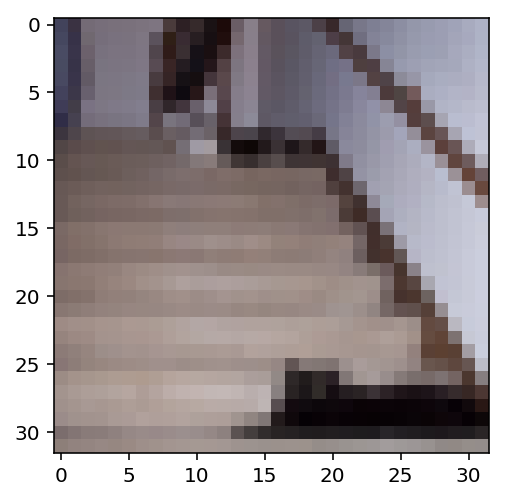

In [0]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]]))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]]))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 9397
다음 그림은 Bird 입니다.
모델의 예측 : Frog
모델의 카테고리별 확률 : 
{'Airplane': 3.0, 'Automobile': 0.0, 'Bird': 35.0, 'Cat': 12.0, 'Deer': 1.0, 'Dog': 6.0, 'Frog': 39.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


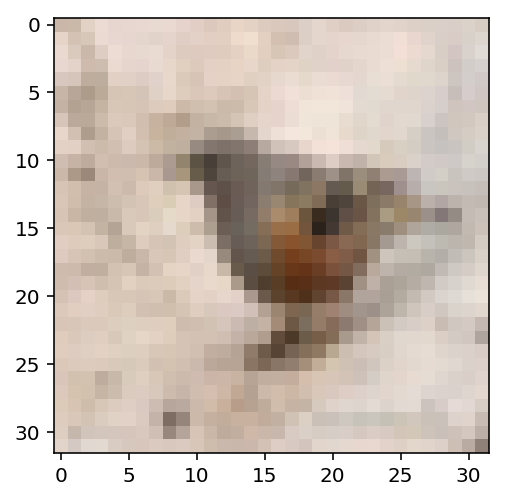

In [0]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]]))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]]))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()